In [1]:
import numpy as np


In [3]:
a = np.array([2,4,1,2])

In [5]:
np.mean(a)

2.25

In [1]:
"""=============================================================================
   Minh họa: Bách phân vị
============================================================================="""
import math
import numpy as np

##------------------------------------------------------------------------------
## Hàm tính bách phân vị thứ p của dãy số
##    rank = (p * n) / 100
##------------------------------------------------------------------------------
def percentile1(data, p):
    
    data = sorted(data)
    size = len(data)

    if (p == 0):
        value = data[0]
    elif (p == 100):
        value = data[size - 1]
    else:
        # Tính chỉ số rank
        i = (p * size) / 100
        k = int(i)
    
        # Tính phân vị thứ p
        if (k == i):
            print('i =', i, 'k =', k)
        
            value = (data[k - 1] + data[k]) / 2
        else:
            value = data[k]

        ## Interpolation
        ## f = i - k
        ## value = ((1 - f) * x[k - 1]) + (f * x[k])
    return value

def percentile2(data, p):
    size = len(data)
    return sorted(data)[int(math.ceil((size * p) / 100)) - 1]

def percentile_python(x, p):
    x = sorted(x)
    percentiles = np.zeros(5)
    percentiles[0] = np.percentile(x, p)        # Default: linear
    percentiles[1] = np.percentile(x, p, interpolation = 'lower')
    percentiles[2] = np.percentile(x, p, interpolation = 'higher')
    percentiles[3] = np.percentile(x, p, interpolation = 'midpoint')
    percentiles[4] = np.percentile(x, p, interpolation = 'nearest')
   
    return percentiles
##------------------------------------------------------------------------------

## 
x = np.array([8, 9, 12, 14.5, 15.5, 17, 18])
p = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

print('\n** Sử dụng hàm np.percentile()')
##------------------------------------------------------------------------------
## INTERPOLATION parameter --> khi rank = 1 + (p * (n - 1)) / 100 không là số nguyên,
##    rank thuộc khoảng (l, u)
##    ‘linear’: l + (u - l) * f; (f là phần thập phân của rank)
##    ‘lower’: l
##    ‘higher’: u
##    ‘midpoint’: (l + u) / 2
##    ‘nearest’: làm tròn rank
##------------------------------------------------------------------------------
percentiles = np.zeros((len(p), 6))

for i in range(0, len(p)):
    print('  Bách phân vị P%d =' %p[i], percentile_python(x, p[i]))


print('\n** Sử dụng công thức')
for i in range(0, len(p)):
    print('  Bách phân vị P%d =' %p[i], percentile1(x, p[i]))

x = np.array([3650, 3730, 3355, 3450, 3480, 3480, 3490, 3520, 3310, 3540, 3550, 3925])



** Sử dụng hàm np.percentile()
  Bách phân vị P0 = [8. 8. 8. 8. 8.]
  Bách phân vị P5 = [8.3 8.  9.  8.5 8. ]
  Bách phân vị P10 = [8.6 8.  9.  8.5 9. ]
  Bách phân vị P15 = [8.9 8.  9.  8.5 9. ]
  Bách phân vị P20 = [ 9.6  9.  12.  10.5  9. ]
  Bách phân vị P25 = [10.5  9.  12.  10.5 12. ]
  Bách phân vị P30 = [11.4  9.  12.  10.5 12. ]
  Bách phân vị P35 = [12.25 12.   14.5  13.25 12.  ]
  Bách phân vị P40 = [13.   12.   14.5  13.25 12.  ]
  Bách phân vị P45 = [13.75 12.   14.5  13.25 14.5 ]
  Bách phân vị P50 = [14.5 14.5 14.5 14.5 14.5]
  Bách phân vị P55 = [14.8 14.5 15.5 15.  14.5]
  Bách phân vị P60 = [15.1 14.5 15.5 15.  15.5]
  Bách phân vị P65 = [15.4 14.5 15.5 15.  15.5]
  Bách phân vị P70 = [15.8  15.5  17.   16.25 15.5 ]
  Bách phân vị P75 = [16.25 15.5  17.   16.25 15.5 ]
  Bách phân vị P80 = [16.7  15.5  17.   16.25 17.  ]
  Bách phân vị P85 = [17.1 17.  18.  17.5 17. ]
  Bách phân vị P90 = [17.4 17.  18.  17.5 17. ]
  Bách phân vị P95 = [17.7 17.  18.  17.5 18. ]
  Bác

*** 1. Tạo mảng dữ liệu chứa từ nội dung tập tin ***
Data:
 23 20 16 18 30 22 26 15 5 18
14 17 11 37 21 6 10 20 22 25
19 19 19 20 12 23 24 17 18 16
27 16 28 26 15 29 19 35 20 17
12 30 21 22 20 15 18 16 23 24
15 24 28 19 24 22 17 19 8 18
17 18 23 21 25 19 20 22 21 21
16 20 19 11 23 17 23 13 17 26
26 14 15 16 27 18 21 24 33 20
21 27 18 22 17 20 14 21 22 19 

Cars array:
 [23 20 16 18 30 22 26 15  5 18 14 17 11 37 21  6 10 20 22 25 19 19 19 20
 12 23 24 17 18 16 27 16 28 26 15 29 19 35 20 17 12 30 21 22 20 15 18 16
 23 24 15 24 28 19 24 22 17 19  8 18 17 18 23 21 25 19 20 22 21 21 16 20
 19 11 23 17 23 13 17 26 26 14 15 16 27 18 21 24 33 20 21 27 18 22 17 20
 14 21 22 19] 

*** 2. Vẽ biểu đồ phân phối tần suất của dữ liệu    ***


c:\program files\python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


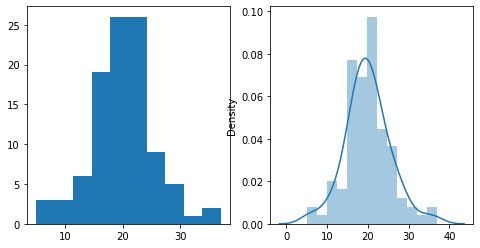

*** 3. Những thống kê cơ bản trên dữ liệu    ***
Mean   x_    = 19.97
MIN    x_min = 5
MAX    x_max = 37
Median x_med = 20.0
Mode   x_mod = 19
       f(x)  = 9
*** 4. Tìm range                             ***
Range        = 32
*** 5. Tìm các giá trị bách phân vị          ***
Percentiles = [11. 15. 17. 20. 23. 27.]


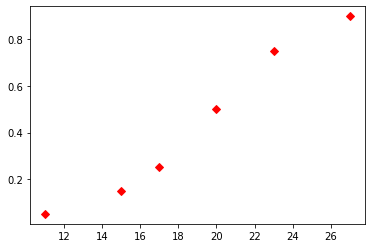

*** 6. Vẽ boxplot. Dùng z-score để xác định outliers ***
Z-scores:
 [ 0.54874468  0.00543312 -0.71898231 -0.3567746   1.81647168  0.36764083
  1.09205625 -0.90008617 -2.71112473 -0.3567746  -1.08119002 -0.53787845
 -1.62450159  3.08419867  0.18653697 -2.53002087 -1.80560545  0.00543312
  0.36764083  0.9109524  -0.17567074 -0.17567074 -0.17567074  0.00543312
 -1.44339773  0.54874468  0.72984854 -0.53787845 -0.3567746  -0.71898231
  1.27316011 -0.71898231  1.45426396  1.09205625 -0.90008617  1.63536782
 -0.17567074  2.72199096  0.00543312 -0.53787845 -1.44339773  1.81647168
  0.18653697  0.36764083  0.00543312 -0.90008617 -0.3567746  -0.71898231
  0.54874468  0.72984854 -0.90008617  0.72984854  1.45426396 -0.17567074
  0.72984854  0.36764083 -0.53787845 -0.17567074 -2.16781316 -0.3567746
 -0.53787845 -0.3567746   0.54874468  0.18653697  0.9109524  -0.17567074
  0.00543312  0.36764083  0.18653697  0.18653697 -0.71898231  0.00543312
 -0.17567074 -1.62450159  0.54874468 -0.53787845  0.54874

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


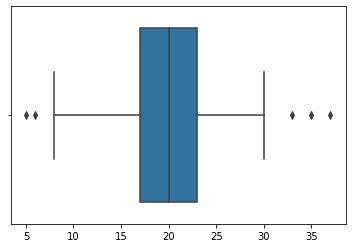

In [3]:
"""=============================================================================
Bài toán: Một thanh tra giao thông đã đếm số lượng ô tô đi qua một điểm nhất định 
          trong 100 khoảng thời gian (cách nhau 20 phút). Các quan sát được liệt kê
          trong tập tin count_cars.txt.
   1. Tạo cars_array từ nội dung tập tin.
   2. Vẽ biểu đồ phân phối tần suất của cars_array
   3. Thống kê cơ bản cho cars_array; 
      mean, median, mode (những giá trị nào? số lần bao nhiêu?), max, min, ...
   4. Tìm range
   5. Cho biết giá trị ở phân vị thứ [5, 15, 25, 50, 75, 90] của cars_array. 
      Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.
   6. Vẽ boxplot của cars_array. 
      Dùng z-score để xác định outliers (indexes nào ? giá trị outliers ?)
   7. Tìm IQR cho car_arrays
   8. Tìm phương sai (variance) cùa cars_array
   9. Tìm độ lệch chuẩn Standard deviation của cars_array
   10. Tìm độ xiên (Skewness) của cars_array. Nhận xét kết quả.
   11. Tìm độ nhọn Kurtosis của cars_array. Nhận xét kết quả.   
============================================================================="""

import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

from numpy import mean, median
from scipy import stats

print('====================================================')
print('*** 1. Tạo mảng dữ liệu chứa từ nội dung tập tin ***')
print('====================================================')
# folder     = 'Data/Bai 5/'
# f          = open(folder + 'count_cars.txt', 'r')
f          = open('count_cars.txt', 'r')
content    = f.read()
print('Data:\n', content, '\n')

cars       = content.split()
cars       = list(map(int, cars))
cars_array = np.array(cars)
print('Cars array:\n', cars_array, '\n')

type(cars_array)

print('=======================================================')
print('*** 2. Vẽ biểu đồ phân phối tần suất của dữ liệu    ***')
print('=======================================================')
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plt.hist(cars_array)
plt.subplot(1, 2, 2)
sns.distplot(cars_array)
plt.show()

print('================================================')
print('*** 3. Những thống kê cơ bản trên dữ liệu    ***')
print('================================================')
print('Mean   x_    =', mean(cars_array))
print('MIN    x_min =', min(cars_array))
print('MAX    x_max =', max(cars_array))
print('Median x_med =', median(cars_array))
x_mod = stats.mode(cars_array)
print('Mode   x_mod =', x_mod[0][0])
print('       f(x)  =', x_mod[1][0]) # số lần

print('================================================')
print('*** 4. Tìm range                             ***')
print('================================================')
range_cars = np.ptp(cars_array)
print('Range        =', range_cars)

print('================================================')
print('*** 5. Tìm các giá trị bách phân vị          ***')
print('================================================')
percentiles = np.array([5, 15, 25, 50, 75, 90])      # trục tung
x           = np.percentile(cars_array, percentiles) # trục hoành
print('Percentiles =', x)
plt.plot(x, percentiles/100, marker = 'D', color = 'red', linestyle = 'none')
plt.show()

print('========================================================')
print('*** 6. Vẽ boxplot. Dùng z-score để xác định outliers ***')
print('========================================================')
sns.boxplot(cars_array)

z_scores = stats.zscore(cars_array)
print('Z-scores:\n', z_scores)

## outliers
outliers = z_scores[[(n <= -2.5)|(n >= 2.5) for n in z_scores]]
indexes  = [z_scores.tolist().index(i) for i in outliers]
print('Outlier(s) [', indexes, ']:', cars_array[indexes])

print('================================================')
print('*** 7. Tìm IQR                               ***')
print('================================================')
IQR = stats.iqr(cars_array)
print('IQR      =', IQR)

print('================================================')
print('*** 8. Tìm phương sai                        ***')
print('================================================')
var_cars = np.var(cars_array)
print('Variance =', var_cars)

print('================================================')
print('*** 9. Tìm độ lệch chuẩn                     ***')
print('================================================')
std_cars = np.std(cars_array)
print('Std-dev. =', std_cars)

print('================================================')
print('*** 10. Tìm độ nghiêng (skewness)            ***')
print('================================================')
skew_cars = stats.skew(cars_array)
print('Skewness =', skew_cars)

print('================================================')
print('*** 11. Tìm độ nhọn kurtosis. Nhận xét.      ***')
print('================================================')
kur_cars = stats.kurtosis(cars_array) # fisher = True (default) --> (kur - 3)
print('Excess Kurtosis =', kur_cars)

kur_cars = stats.kurtosis(cars_array, fisher = False)
print('Kurtosis        =', kur_cars)

print('Số liệu thống kê:', stats.describe(cars_array))
